# Exercise 10

- In this exercise we will train a neural net to learn the two spirals dataset from [SyntheticDatasets.jl](https://github.com/ATISLabs/SyntheticDatasets.jl).

In [6]:
import Pkg 
Pkg.activate(".")
Pkg.add(["Flux", "Plots"])

  Activating project at `~/code/TUM-Dynamics-Lecture/exercises/exercise-10`
   Resolving package versions...
  No Changes to `~/code/TUM-Dynamics-Lecture/exercises/exercise-10/Project.toml`
  No Changes to `~/code/TUM-Dynamics-Lecture/exercises/exercise-10/Manifest.toml`


  [cc61e674] + Xorg_libxkbfile_jll v1.1.2+1
  [e920d4aa] + Xorg_xcb_util_cursor_jll v0.1.4+0
  [12413925] + Xorg_xcb_util_image_jll v0.4.0+1
  [2def613f] + Xorg_xcb_util_jll v0.4.0+1
  [975044d2] + Xorg_xcb_util_keysyms_jll v0.4.0+1
  [0d47668e] + Xorg_xcb_util_renderutil_jll v0.3.9+1
  [c22f9ab0] + Xorg_xcb_util_wm_jll v0.4.1+1
  [35661453] + Xorg_xkbcomp_jll v1.4.6+1
  [33bec58e] + Xorg_xkeyboard_config_jll v2.39.0+0
  [c5fb5394] + Xorg_xtrans_jll v1.5.0+1
  [3161d3a3] + Zstd_jll v1.5.6+1
  [35ca27e7] + eudev_jll v3.2.9+0
  [214eeab7] + fzf_jll v0.56.3+0
  [1a1c6b14] + gperf_jll v3.1.1+1
  [a4ae2306] + libaom_jll v3.9.0+0
  [0ac62f75] + libass_jll v0.15.2+0
  [1183f4f0] + libdecor_jll v0.2.2+0
  [2db6ffa8] + libevdev_jll v1.11.0+0
  [f638f0a6] + libfdk_aac_jll v2.0.3+0
  [36db933b] + libinput_jll v1.18.0+0
  [b53b4c65] + libpng_jll v1.6.44+0
  [f27f6e37] + libvorbis_jll v1.3.7+2
  [009596ad] + mtdev_jll v1.1.6+0
⌅ [1270edf5] + x264_jll v2021.5.5+0
⌅ [dfaa095f] + x265_jll v3.5.0+0
  [

In [7]:
using Flux, Plots

Precompiling SparseArraysExt
  ✓ KernelAbstractions → LinearAlgebraExt
  ✓ KernelAbstractions → SparseArraysExt
  2 dependencies successfully precompiled in 5 seconds. 31 already precompiled.
[ Info: Precompiling SparseArraysExt [85068d23-b5fb-53f1-8204-05c2aba6942f]
┌ Warning: Module KernelAbstractions with build ID fafbfcfd-80e9-0f54-0000-03f973b44d39 is missing from the cache.
│ This may mean KernelAbstractions [63c18a36-062a-441e-b654-da1e3ab1ce7c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing SparseArraysExt [85068d23-b5fb-53f1-8204-05c2aba6942f].
[ Info: Precompiling LinearAlgebraExt [66d79d19-2cc4-5b0b-ac7a-b340256d1ecd]
┌ Warning: Module KernelAbstractions with build ID fafbfcfd-80e9-0f54-0000-03f973b44d39 is missing from the cache.
│ This may mean KernelAbstractions [63c18a36-062a-441e-b654-da1e3ab1ce7c] does not support precompilation but is imported by a m

[ Info: Skipping precompilation since __precompile__(false). Importing StructArraysGPUArraysCoreExt [cbbf52aa-d660-55d4-8a5a-33845bbaa85d].
[ Info: Precompiling StructArraysStaticArraysExt [d1e1e8be-46cf-5459-abb8-be6c7518b661]
┌ Warning: Module StructArrays with build ID fafbfcfd-4d56-9bb8-0000-04080689416d is missing from the cache.
│ This may mean StructArrays [09ab397b-f2b6-538f-b94a-2f83cf4a842a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing StructArraysStaticArraysExt [d1e1e8be-46cf-5459-abb8-be6c7518b661].
[ Info: Precompiling StructArraysSparseArraysExt [d5b9410b-929f-5d61-aab8-0598522fd334]
┌ Warning: Module StructArrays with build ID fafbfcfd-4d56-9bb8-0000-04080689416d is missing from the cache.
│ This may mean StructArrays [09ab397b-f2b6-538f-b94a-2f83cf4a842a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948

┌ Warning: Module MLDataDevices with build ID fafbfcfd-6b63-3a49-0000-040f7023ae25 is missing from the cache.
│ This may mean MLDataDevices [7e8f7934-dd98-4c1a-8fe8-92b47a384d40] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing MLDataDevicesZygoteExt [37b8f99f-6f97-57a3-b9f9-a4dd545e3a97].
[ Info: Precompiling MLDataDevicesChainRulesExt [5ef07d41-9f15-5fb1-919e-6a30dc1fea2b]
┌ Warning: Module MLDataDevices with build ID fafbfcfd-6b63-3a49-0000-040f7023ae25 is missing from the cache.
│ This may mean MLDataDevices [7e8f7934-dd98-4c1a-8fe8-92b47a384d40] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing MLDataDevicesChainRulesExt [5ef07d41-9f15-5fb1-919e-6a30dc1fea2b].
[ Info: Precompiling MLDataDevicesOneHotArraysExt [338a49bd-c049-5b4c-976b-5ff9d2bfb7e7]
┌ 

┌ Warning: Module Plots with build ID ffffffff-ffff-ffff-0000-0437b8be4970 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a].


In [8]:
"""
    make_twospirals(; n_samples::Int = 2000,
                      start_degrees::Int = 90,
                      total_degrees::Int = 570,
                      noise::Float64 = 0.2)

Generate two spirals dataset. Return a Nx3 matrix, where each line contains 
the X,Y coordinates and the class of an instance.

# Arguments
- `n_samples::Int = 2000`: The total number of points generated.
- `start_degrees::Int = 90`: Determines how far from the origin the spirals start.
- `total_degrees::Int = 570`: Controls the length of the spirals.
- `noise::Float64 = 0.2`: Determines the noise in the dataset.

Reference: [SyntheticDatasets.jl](https://github.com/ATISLabs/SyntheticDatasets.jl)
Reference: [link](https://la.mathworks.com/matlabcentral/fileexchange/41459-6-functions-for-generating-artificial-datasets)
"""
function make_twospirals(; n_samples::Int = 2000,
                           start_degrees::Int = 90,
                           total_degrees::Int = 570,
                           noise::Float64 = 0.2)
    start_radians = deg2rad(start_degrees)
    
    n_samples_spiral1 = floor(Int, n_samples / 2)
    n_samples_spiral2 = n_samples - n_samples_spiral1
    
    # Generate first spiral
    theta_spiral1 = start_radians .+ sqrt.(rand(n_samples_spiral1, 1)) .* deg2rad(total_degrees)
    spiral1_points = [-cos.(theta_spiral1) .* theta_spiral1 + rand(n_samples_spiral1, 1) .* noise  sin.(theta_spiral1) .* theta_spiral1 + rand(n_samples_spiral1, 1) .* noise]
    
    # Generate second spiral
    theta_spiral2 = start_radians .+ sqrt.(rand(n_samples_spiral2, 1)) .* deg2rad(total_degrees)
    spiral2_points = [cos.(theta_spiral2) .* theta_spiral2 + rand(n_samples_spiral2, 1) * noise  -sin.(theta_spiral2) .* theta_spiral2 + rand(n_samples_spiral2, 1) * noise]
    
    features = [spiral1_points; spiral2_points]
    labels = [zeros(Int, n_samples_spiral1); ones(Int, n_samples_spiral2)]
    
    return (features, labels)
end

make_twospirals

In [9]:
# Generate the data
spirals = make_twospirals(
    n_samples = 1000, 
    start_degrees = 90,
    total_degrees = 630,
    noise = 1.0,
)

([-3.8488611594068853 -2.6762103368365286; -5.813543338588058 -0.5117549261145213; … ; -3.8109096199904355 9.891311451399153; 7.052204754416328 -2.164645764696333], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

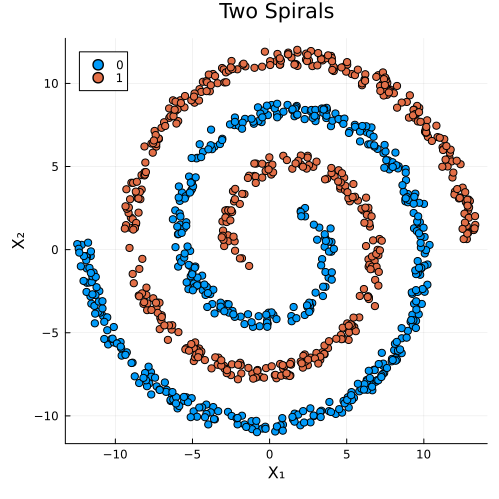

In [10]:
X = spirals[1]
y = spirals[2]

# Plot
scatter(X[:,1], X[:,2], group = y, xlabel = "X₁", ylabel = "X₂", title = "Two Spirals", size = (500, 500))

1. Follow Task 1 and Task 2 from the "Neural Net Spiral" exercise in this interactive [notebook](https://developers.google.com/machine-learning/crash-course/DPE/tp-il-neural-net-intro-spiral) to experiment with many different model setups, varying the number of layers, the width of the layers, and the regularisation.

2. Once you're satisfied with your test error for a given model setup, implement and train that model in Julia using Flux. Note that the noise parameters in the notebook and the SyntheticDatasets library are not equivalent, so just try to use values of the parameters which result in visually similar datasets. Remember to split the data into training and test sets. Is the test error of your implementation comparable to the one in the notebook?